In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')

In [2]:
Classifier=Sequential()
Classifier.add(Convolution2D(32,3,3,input_shape=(250,250,3),activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))
Classifier.add(Convolution2D(128,3,3,activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))
Classifier.add(Flatten())
Classifier.add(Dense(256, activation='relu'))
Classifier.add(Dense(2, activation='softmax'))

Classifier.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
Classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 83, 83, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 41, 41, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 128)       36992     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 256)               1

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [5]:
training_set=train_datagen.flow_from_directory('dataset/Train',target_size=(250,250),batch_size=32,class_mode='categorical')
test_set=test_datagen.flow_from_directory('dataset/Validation',target_size=(250,250),batch_size=32,class_mode='categorical')

Found 299 images belonging to 2 classes.
Found 62 images belonging to 2 classes.


In [6]:
from IPython.display import display

In [7]:
img_dims = 150
epochs =  100
batch_size = 32

In [8]:
history=Classifier.fit_generator( training_set, steps_per_epoch=training_set.samples // batch_size, 
           epochs=epochs, 
           validation_data=test_set,validation_steps=test_set.samples // batch_size)

Epoch 1/100
9/9 [==============================] - 28s 3s/step - loss: 0.7264 - accuracy: 0.5131 - val_loss: 0.7417 - val_accuracy: 0.4062
Epoch 2/100
9/9 [==============================] - 22s 2s/step - loss: 0.7019 - accuracy: 0.5094 - val_loss: 0.6916 - val_accuracy: 0.4688
Epoch 3/100
9/9 [==============================] - 21s 3s/step - loss: 0.7400 - accuracy: 0.5730 - val_loss: 0.6385 - val_accuracy: 0.6875
Epoch 4/100
9/9 [==============================] - 21s 2s/step - loss: 0.6863 - accuracy: 0.6067 - val_loss: 1.2061 - val_accuracy: 0.4688
Epoch 5/100
9/9 [==============================] - 21s 2s/step - loss: 0.7150 - accuracy: 0.5993 - val_loss: 0.8396 - val_accuracy: 0.5625
Epoch 6/100
9/9 [==============================] - 21s 2s/step - loss: 0.7083 - accuracy: 0.6067 - val_loss: 0.7291 - val_accuracy: 0.5000
Epoch 7/100
9/9 [==============================] - 21s 2s/step - loss: 0.6639 - accuracy: 0.6142 - val_loss: 0.6562 - val_accuracy: 0.5625
Epoch 8/100
9/9 [==========

In [9]:
import h5py

In [10]:
Classifier.save('Traintrack.h5')
       

In [6]:
from keras.models import load_model

In [7]:
model=load_model('Traintrack.h5')

In [13]:
import numpy as np

In [35]:
from tensorflow.keras.preprocessing import image
test_image=image.load_img('test1.jpg',target_size=(250,250))

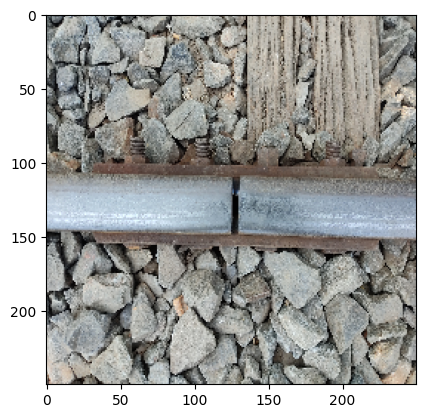

In [15]:
import matplotlib.pyplot as plt
img = plt.imshow(test_image)

In [16]:
test_image=image.img_to_array(test_image)

In [17]:
test_image=np.expand_dims(test_image,axis=0)

In [18]:
result=model.predict(test_image)

1/1 [==============================] - 0s 71ms/step


In [19]:
prediction = result[0]

In [20]:
classes=training_set.class_indices

In [21]:
classes

{'Defective': 0, 'Non defective': 1}

In [22]:
prediction=list(prediction)

In [23]:
prediction

[0.0, 1.0]

In [24]:
classes=['Defective', 'Non defective']

In [25]:
output=zip(classes,prediction)

In [26]:
output=dict(output)

In [27]:
output

{'Defective': 0.0, 'Non defective': 1.0}

In [28]:
if output['Defective']==1.0 :
    print("Defective")
elif output['Non defective']==1.0:
    print("Non defective")


Non defective


In [29]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(test_set)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy


2/2 [==============================] - 4s 2s/step - loss: 0.5330 - accuracy: 0.8871
Test Accuracy: 88.70967626571655


In [30]:
import matplotlib.pyplot as plt

In [31]:
def graph():
    #Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

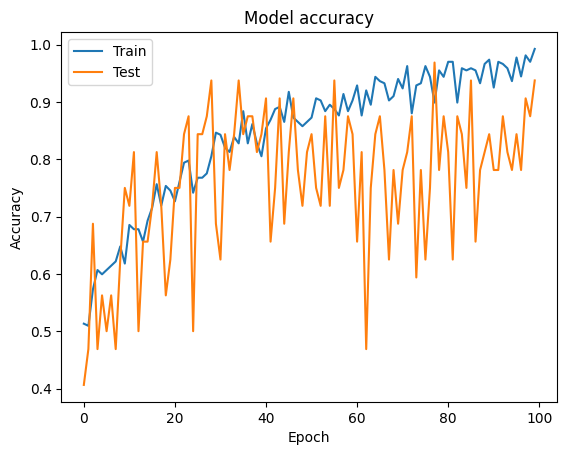

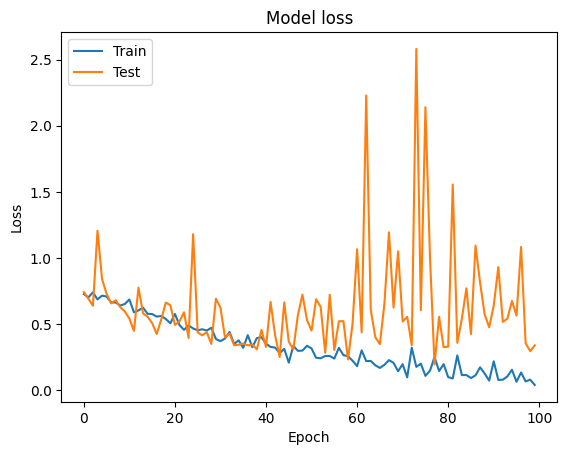

In [32]:
graph()

In [33]:
import seaborn as sns

In [34]:
from sklearn.metrics import classification_report, confusion_matrix

In [35]:
def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

               precision    recall  f1-score   support

    Defective       0.60      0.58      0.59        31
Non defective       0.59      0.61      0.60        31

     accuracy                           0.60        62
    macro avg       0.60      0.60      0.60        62
 weighted avg       0.60      0.60      0.60        62



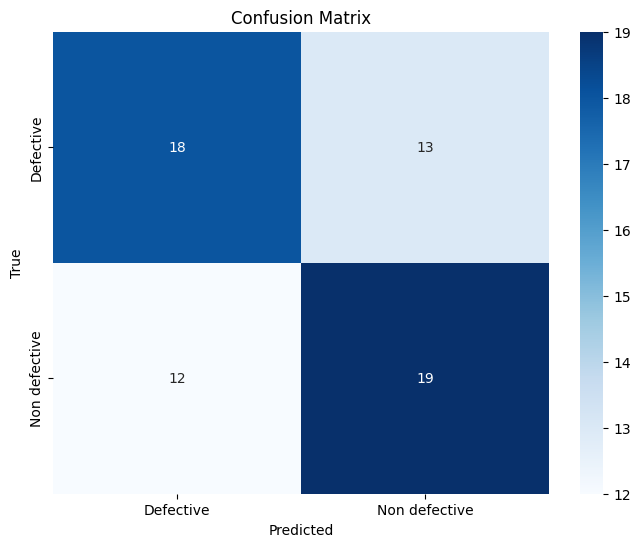

In [36]:
# Evaluate the model on the test set
test_set.reset()
y_true = test_set.classes
y_pred = np.argmax(model.predict_generator(test_set, steps=len(test_set)), axis=1)

# Print classification report
class_names = list(test_set.class_indices.keys())
print(classification_report(y_true, y_pred, target_names=class_names))

# Plot confusion matrix
plot_confusion_matrix(y_true, y_pred, class_names)

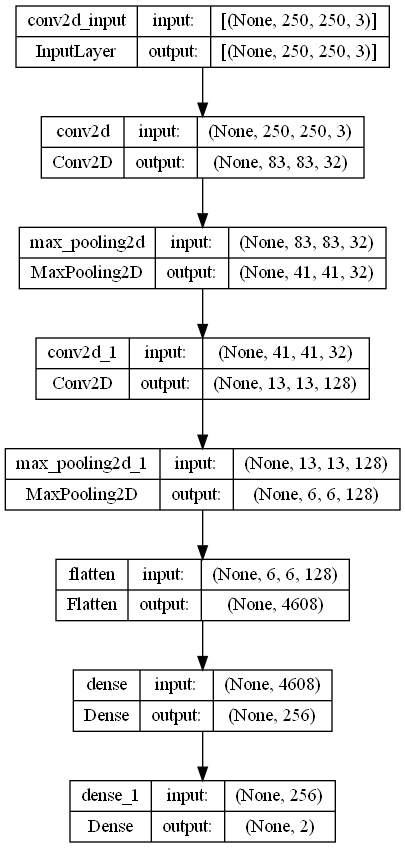

In [4]:
from tensorflow.keras.utils import plot_model

# Visualize the model architecture
plot_model(Classifier, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

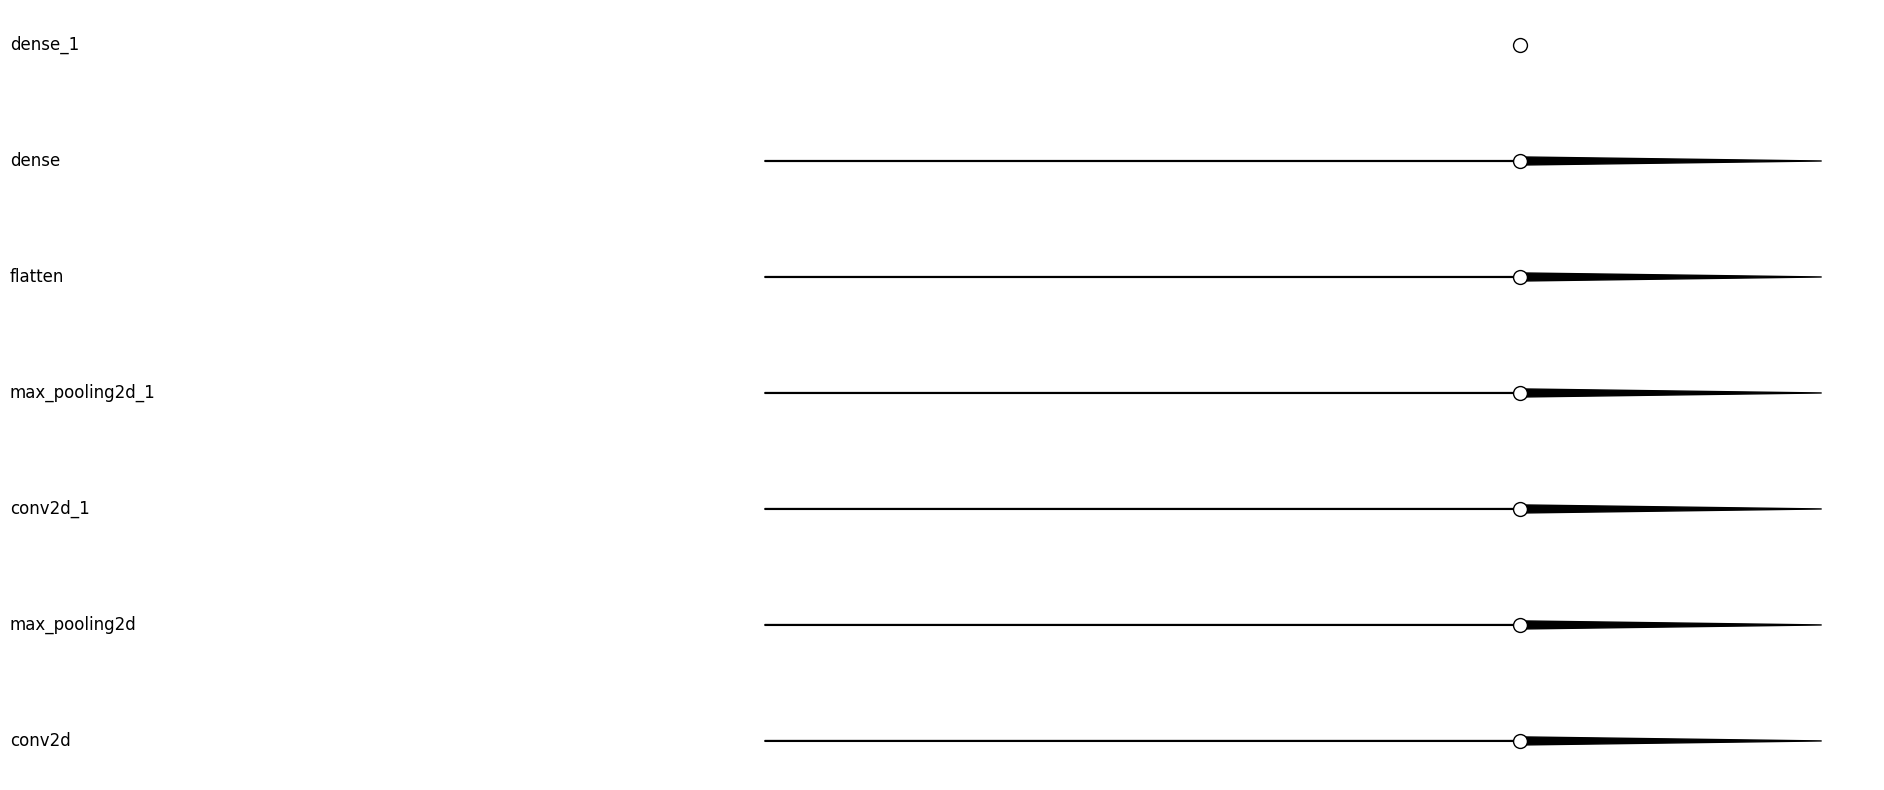

In [5]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

def plot_custom_model_architecture(model, show_shapes=True, show_layer_names=True, to_file='model_architecture.png'):
    layers = model.layers

    # Create a custom diagram
    fig, ax = plt.subplots(figsize=(15, 10))

    # Add nodes for each layer
    for i, layer in enumerate(layers):
        ax.text(0.1, i / len(layers), layer.name, fontsize=12, va='center', ha='left')
        ax.scatter(0.2, i / len(layers), s=100, color='white', edgecolors='black', zorder=10)
        if i > 0:
            ax.arrow(0.15, (i - 1) / len(layers), 0.05, 0, head_width=0.01, head_length=0.02, fc='black', ec='black')

    # Remove axis
    ax.set_axis_off()

    # Save the custom diagram
    plt.savefig(to_file, bbox_inches='tight', pad_inches=0.1)

# Visualize the model architecture with the custom diagram
plot_custom_model_architecture(Classifier, to_file='custom_model_architecture.png')


In [8]:
import visualkeras


visualkeras.layered_view(model).show() # display using your system viewer
visualkeras.layered_view(model, to_file='output_m3.png') # write to disk
visualkeras.layered_view(model, to_file='output_m3.png').show() # write and show

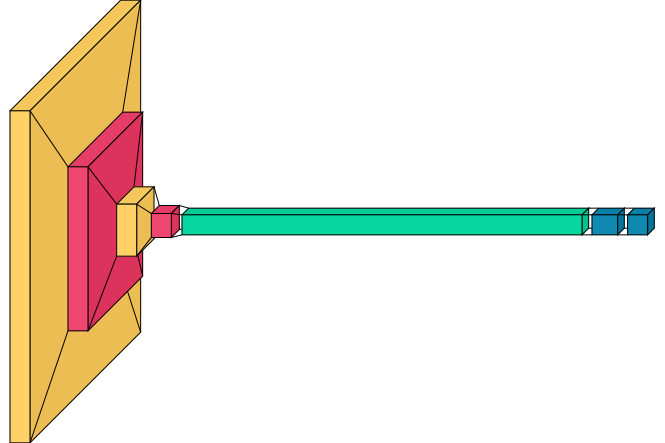

In [9]:
visualkeras.layered_view(model)

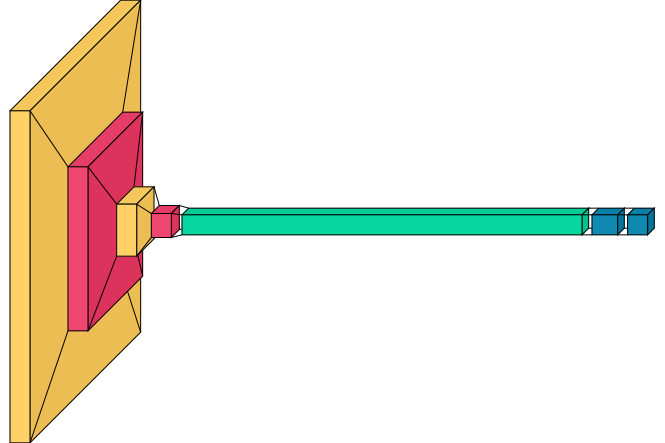

In [52]:
from tensorflow.python.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, ZeroPadding2D
from collections import defaultdict

color_map = defaultdict(dict)
color_map[Conv2D]['fill'] = 'orange'
color_map[ZeroPadding2D]['fill'] = 'gray'
color_map[Dropout]['fill'] = 'pink'
color_map[MaxPooling2D]['fill'] = 'red'
color_map[Dense]['fill'] = 'green'
color_map[Flatten]['fill'] = 'teal'

visualkeras.layered_view(model, color_map=color_map)